
<!-- Adjust the path and filename as per your actual file location -->
<img src="./BA%20plane1.jpg" alt="British Airways Plane" style="width: 90%; height: 250px; display: block; margin: auto;">


Exploratory Data Analysis (EDA) of Flight and Rating Data
Air travel is more than just getting from point A to point B—it's an experience shaped by numerous factors. In this project, we delve into comprehensive flight and rating data spanning from 2019 to 2024 provided by British Airways. Our goal is to uncover the underlying patterns and insights that define customer preferences and operational dynamics within the airline industry.

From analyzing popular flight routes to understanding customer ratings across various service dimensions like staff service, food quality, and seat comfort, we aim to identify key trends and areas for improvement. Through visualization and statistical analysis, we'll explore questions such as:

- What are the most frequently flown routes by British Airways?
- What are the customer satisfaction base off of average ratings?
- What kind of passengers should be Bristish airways focus?
- What correlations exist between various service ratings?
- Was British Airways recommended 

By meticulously examining this dataset and performing exploratory data analysis, we aim to equip British Airways with actionable insights to enhance operational efficiency, improve service quality, and ultimately elevate customer satisfaction.

In [58]:
# Importing Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

In [59]:
# Loading datasets
ratings = pd.read_csv('B_Airways_ratings.csv')
flight_info = pd.read_csv('B_Airways_flight_info.csv')
# Dropping additional index column
ratings.drop(columns= 'Unnamed: 0', inplace= True)
flight_info.drop(columns= 'Unnamed: 0', inplace= True)
# Previewing suspected irregularities
flight_info[flight_info.index.isin([3144,3145,3146,3148,3149,3152])]



,aircraft,travellers_type,Seat_type,route,date_flown
3144,NaN,A319,Business,Business Class,FRA-LHR
3145,NaN,Boeing 777,Couple Leisure,Business Class,Gatwick to Barbados
3146,NaN,Airbus 319,Business,Business Class,Kiev to London
3148,NaN,Boeing 747-400,Business,Business Class,London-Vancouver return
3149,NaN,Boeing 747-400,Business,Business Class,LHR-ORD
3152,NaN,Boeing 747 / 777,Family Leisure,Business Class,NaN


Unusual data structure was detected at the tail end of the dataset

In [60]:

#display(ratings) 
df = flight_info[flight_info.index.isin([3144,3145,3146,3148,3149,3152])]
def shift_left(row):
    # Get non-nan values
    values = row.dropna().values
    # Calculate the number of nan values to add at the end
    num_nans = len(row) - len(values)
    # Create the new row with shifted values
    new_row = list(values) + [np.nan] * num_nans
    return pd.Series(new_row, index=row.index)

# Apply the function to each row
df = df.apply(shift_left, axis=1).reset_index(drop=True)

# Display the updated DataFrame
df


,aircraft,travellers_type,Seat_type,route,date_flown
0,A319,Business,Business Class,FRA-LHR,NaN
1,Boeing 777,Couple Leisure,Business Class,Gatwick to Barbados,NaN
2,Airbus 319,Business,Business Class,Kiev to London,NaN
3,Boeing 747-400,Business,Business Class,London-Vancouver return,NaN
4,Boeing 747-400,Business,Business Class,LHR-ORD,NaN
5,Boeing 747 / 777,Family Leisure,Business Class,NaN,NaN


Columns are shifted to the left to restructure data

In [61]:
# Filling re structured data to actual data
flight_info.iloc[flight_info[flight_info.index.isin([3144,3145,3146,3148,3149,3152])].index] = df
flight_info[flight_info.index.isin([3144,3145,3146,3148,3149,3152])]


,aircraft,travellers_type,Seat_type,route,date_flown
3144,A319,Business,Business Class,FRA-LHR,NaN
3145,Boeing 777,Couple Leisure,Business Class,Gatwick to Barbados,NaN
3146,Airbus 319,Business,Business Class,Kiev to London,NaN
3148,Boeing 747-400,Business,Business Class,London-Vancouver return,NaN
3149,Boeing 747-400,Business,Business Class,LHR-ORD,NaN
3152,Boeing 747 / 777,Family Leisure,Business Class,NaN,NaN


re-structured data are filled into actual dataset 

In [62]:
def to_date(df,col):
    """
    Converts a specified column in a DataFrame to datetime format.

    This function takes a pandas DataFrame and a column name, then converts the specified column to datetime format.
    It uses the `pd.to_datetime` function with `infer_datetime_format=True` to infer the format of the datetime strings
    and `errors='coerce'` to handle invalid parsing by setting invalid dates as NaT.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the column to be converted.
    col (str): The name of the column to be converted to datetime format.

    Returns:
    pandas.Series: The converted column in datetime format.

    Example:
    >>> import pandas as pd
    >>> data = {'date': ['2023-01-01', '2023-02-15', 'invalid_date']}
    >>> df = pd.DataFrame(data)
    >>> df['date'] = to_date(df, 'date')
    >>> print(df)
             date
    0  2023-01-01
    1  2023-02-15
    2         NaT
    """
    df[col] = pd.to_datetime(df[col],infer_datetime_format= True, errors= 'coerce')
    return df[col]

In [63]:
# Correcting data types
flight_info['date_flown'] = to_date(flight_info,'date_flown')
flight_info.dtypes

C:\Users\USER\AppData\Local\Temp\ipykernel_13684\1281769113.py:27: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col] = pd.to_datetime(df[col],infer_datetime_format= True, errors= 'coerce')
C:\Users\USER\AppData\Local\Temp\ipykernel_13684\1281769113.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col],infer_datetime_format= True, errors= 'coerce')


aircraft                   object
travellers_type            object
Seat_type                  object
route                      object
date_flown         datetime64[ns]
dtype: object

Date column is converted to datetime data type for better manipulation


In [64]:
# Overview of dataset 
flight_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   aircraft         2050 non-null   object        
 1   travellers_type  3153 non-null   object        
 2   Seat_type        3920 non-null   object        
 3   route            3151 non-null   object        
 4   date_flown       3135 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 153.3+ KB


Null values detected in the flight_info dataset

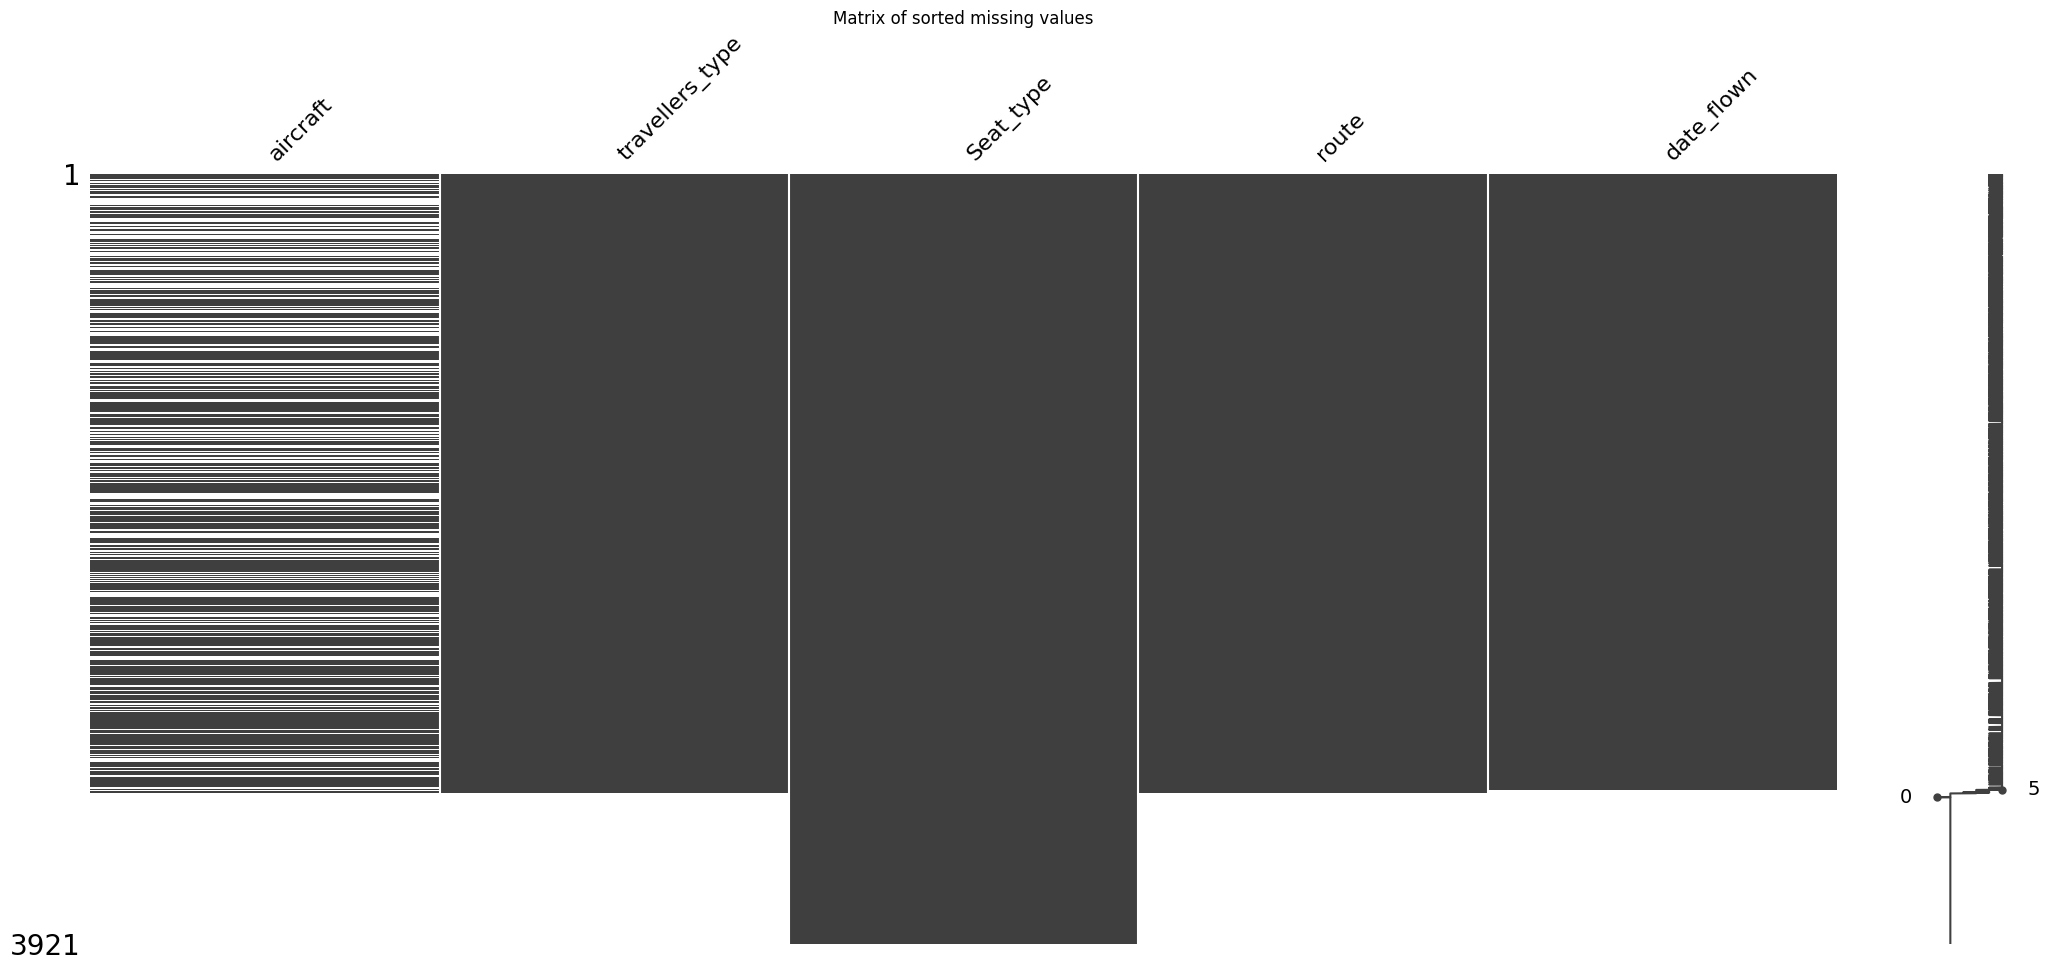

In [65]:
# Plotting missing value matrix
sorted = flight_info.sort_values(by= 'date_flown', ascending= False)
%matplotlib inline
msno.matrix(sorted)
plt.title('Matrix of sorted missing values')
plt.show()

Missing values MAR type. Missing datas are related to the date when flight was flown (date_flown column). That is there were little data available in later dates 

In [66]:
# Defining function to handle missing data
def clean(df,col):
    """
    Cleans a specified column in a DataFrame by forward filling missing values and then dropping any remaining missing values.

    This function takes a pandas DataFrame and a column name, fills missing values in the specified column using the forward fill method,
    and then drops any rows that still contain missing values.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the column to be cleaned.
    col (str): The name of the column to be cleaned.

    Returns:
    pandas.DataFrame: The cleaned DataFrame with no missing values in the specified column.

    Example:
    >>> import pandas as pd
    >>> data = {'value': [1, None, 2, None, None, 3]}
    >>> df = pd.DataFrame(data)
    >>> df = clean(df, 'value')
    >>> print(df)
       value
    0    1.0
    1    1.0
    2    2.0
    5    3.0
    """
    df[col].fillna(method= 'ffill',inplace=True) # type: ignore
    df.dropna(inplace=True)
    return df

In [67]:
# Number of missing values per columns
print('Number of missing values per column before cleaning: \n',flight_info.isna().sum(),'\n Lenght of dataset with missing values: ', flight_info.shape[0])
# Handling missing data
flight_info = clean(flight_info,'date_flown')
# Corfirming changes 
print('Number of missing values per column before cleaning: \n',flight_info.isna().sum(),'\n Lenght of dataset with missing values: ', flight_info.shape[0])



Number of missing values per column before cleaning: 
 aircraft           1871
travellers_type     768
Seat_type             1
route               770
date_flown          786
dtype: int64 
 Lenght of dataset with missing values:  3921
Number of missing values per column before cleaning: 
 aircraft           0
travellers_type    0
Seat_type          0
route              0
date_flown         0
dtype: int64 
 Lenght of dataset with missing values:  2049


C:\Users\USER\AppData\Local\Temp\ipykernel_13684\2073279122.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method= 'ffill',inplace=True) # type: ignore
C:\Users\USER\AppData\Local\Temp\ipykernel_13684\2073279122.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method= 'ffill',inplace=True) # type: ignore


Aircraft column has been interpolated to avoid heavy lost of data 

In [68]:
print('Number of suspected duplicate rows before: ', flight_info.duplicated().sum())
flight_info[flight_info.duplicated()].sort_values(by= 'Seat_type').head()
# Handling duplicates
flight_info.drop_duplicates(keep= 'first', inplace= True)
print('Number of suspected duplicate rows after: ', flight_info.duplicated().sum())


Number of suspected duplicate rows before:  69
Number of suspected duplicate rows after:  0


In [69]:
# Getting recent data
recent_flight_info = flight_info.loc[flight_info.date_flown >= '2014']
# Addressing irregular row 
recent_flight_info.loc[recent_flight_info.travellers_type=='Boeing 777','travellers_type'] = 'Business'
recent_flight_info[recent_flight_info.travellers_type=='Boeing 777']
recent_flight_info.shape[0]

1980


**Data Imbalance Note**
we observed a significant reduction in available data for flights in later years. To ensure the accuracy and relevance of our insights, we limited our analysis to data from the recent ten(10) years (2014 - 2024) to avoid bias.

In [70]:
# Most flown Aircrafts
recent_flight_info['aircraft'] = recent_flight_info['aircraft'].str.replace(' ','')
most_flown_aircrafts = recent_flight_info.aircraft.value_counts(ascending= False)
display(most_flown_aircrafts.head())

aircraft
A320             383
Boeing777        278
Boeing747-400    183
A380             173
Boeing777-200    129
Name: count, dtype: int64

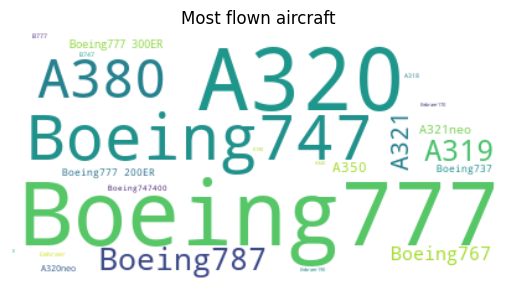

In [71]:
# Plotting most flown Aircrafts
from wordcloud import WordCloud
cloud = WordCloud(background_color= 'white').generate(' '.join(recent_flight_info['aircraft']))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis(False)
plt.title('Most flown aircraft')
plt.show()

The Airbus A320 is the most flown kind of aircraft since the last five years followed by the Boeing aircraft

In [72]:
print(recent_flight_info.travellers_type.value_counts(),'\n\n',recent_flight_info.Seat_type.value_counts())

travellers_type
Couple Leisure    685
Solo Leisure      596
Business          456
Family Leisure    243
Name: count, dtype: int64 

 Seat_type
Economy Class      896
Business Class     743
Premium Economy    193
First Class        148
Name: count, dtype: int64


Null values detected 

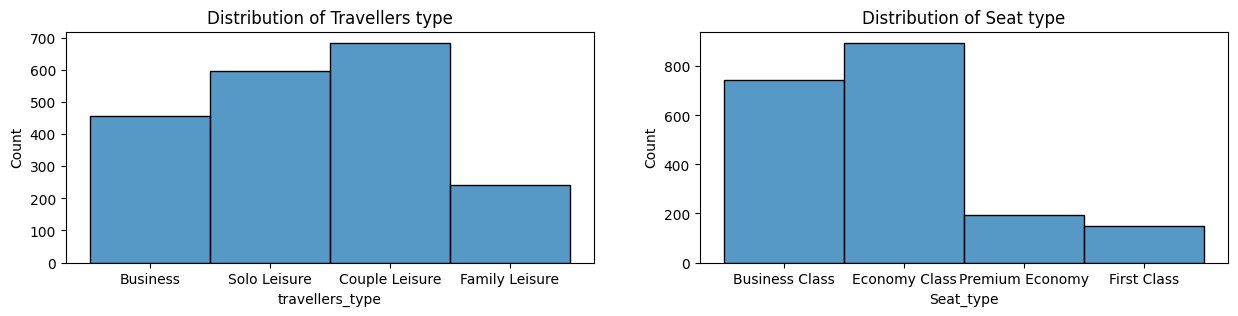

In [73]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize= (15,3))
sns.histplot(data= recent_flight_info, x= 'travellers_type',ax= ax[0]).set_title('Distribution of Travellers type')
sns.histplot(data= recent_flight_info, x= 'Seat_type',ax = ax[1]).set_title('Distribution of Seat type')
plt.show()

We have Couples as highest number of travellers type and Business class as the highest amongst the seat types

In [74]:
# Finding the most flown route
most_flown_route = recent_flight_info['route'].value_counts(ascending=False)
most_flown_route.head()

route
London to Johannesburg    18
Vancouver to London       13
Johannesburg to London    12
Cape Town to London       12
London to Cape Town       11
Name: count, dtype: int64

i found Vancover to London, route between london and Johannesburg as well as other route involving London as most flown route since 2019

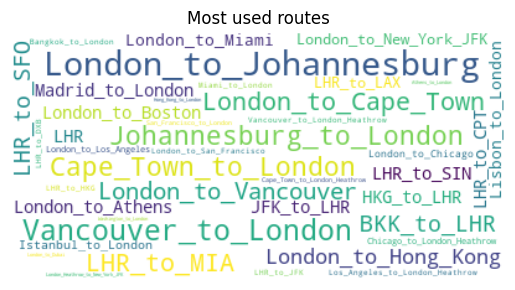

In [75]:
# Plotting most flown Route
from wordcloud import WordCloud
to_plot = recent_flight_info['route'].str.strip().str.replace(' ','_')
cloud1 = WordCloud(background_color= 'white').generate(' '.join(to_plot))
plt.imshow(cloud1, interpolation = 'bilinear')
plt.axis(False)
plt.title('Most used routes')
plt.show()

In [76]:
recent_flight_info['origin'] = recent_flight_info.route.str.split('to').str[0].str.strip().str.replace(' ','_')
recent_flight_info['destination'] = recent_flight_info.route.str.split('to').str[1].str.split('via').str[0].str.strip().str.replace(' ','_')
display(recent_flight_info.head())

,aircraft,travellers_type,Seat_type,route,date_flown,origin,destination
3,A320,Business,Business Class,London Heathrow to Paris CDG,2024-06-01,London_Heathrow,Paris_CDG
4,A350-1000,Solo Leisure,Economy Class,London Heathrow to Vancouver,2024-06-01,London_Heathrow,Vancouver
5,A350-1000,Solo Leisure,Business Class,Vancouver to London Heathrow,2024-06-01,Vancouver,London_Heathrow
6,A320/A380,Couple Leisure,Business Class,Belfast to San Francisco via London,2024-04-01,Belfast,San_Francisco
8,Boeing777,Solo Leisure,Business Class,New York JFK to London Heathrow,2024-06-01,New_York_JFK,London_Heathrow


In [77]:
print(recent_flight_info.origin.value_counts().head(),'\n\n', recent_flight_info.destination.value_counts().head())

origin
London             332
LHR                259
London_Heathrow    169
Gatwick             72
LGW                 54
Name: count, dtype: int64 

 destination
London             248
LHR                174
London_Heathrow    134
Gatwick             52
LGW                 28
Name: count, dtype: int64


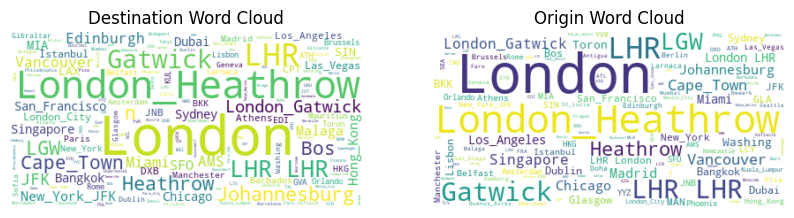

In [78]:
from wordcloud import WordCloud

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

cloud = WordCloud(background_color='white').generate(' '.join(recent_flight_info['destination'].astype('str')))
cloud1 = WordCloud(background_color='white').generate(' '.join(recent_flight_info['origin'].astype('str')))

ax[0].imshow(cloud, interpolation='bilinear')
ax[0].set_title('Destination Word Cloud')

ax[1].imshow(cloud1, interpolation='bilinear')
ax[1].set_title('Origin Word Cloud')

for a in ax:
    a.axis('off')

plt.show()


There is no doubt to saying London is the Heart of the British Airways. As we have London having the highest number of inflow and outflow of passengers


In [79]:
# Overview of ratings dataset
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aircraft        2044 non-null   object 
 1   date_flown      3141 non-null   object 
 2   seat_comfort    3921 non-null   int64  
 3   staff_service   3849 non-null   float64
 4   food_beverage   3791 non-null   float64
 5   ground_service  3768 non-null   float64
 6   pricing         3511 non-null   float64
 7   recommended     3921 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 245.2+ KB


missing values detected 

In [80]:
# Number of missing values per columns
print('Number of missing values per column before cleaning: \n',ratings.isna().sum(),'\n Lenght of dataset with missing values: ', ratings.shape[0])
# Handling missing data
ratings = clean(ratings,'date_flown')
# Corfirming changes 
print('Number of missing values per column after cleaning: \n',ratings.isna().sum(),'\n Lenght of dataset with missing values: ', ratings.shape[0])


Number of missing values per column before cleaning: 
 aircraft          1877
date_flown         780
seat_comfort         0
staff_service       72
food_beverage      130
ground_service     153
pricing            410
recommended          0
dtype: int64 
 Lenght of dataset with missing values:  3921
Number of missing values per column after cleaning: 
 aircraft          0
date_flown        0
seat_comfort      0
staff_service     0
food_beverage     0
ground_service    0
pricing           0
recommended       0
dtype: int64 
 Lenght of dataset with missing values:  1932


C:\Users\USER\AppData\Local\Temp\ipykernel_13684\2073279122.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method= 'ffill',inplace=True) # type: ignore
C:\Users\USER\AppData\Local\Temp\ipykernel_13684\2073279122.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method= 'ffill',inplace=True) # type: ignore


the aircraft column has been interpolated once more to avoid heavy loss of data

In [81]:
print('Number of suspected duplicates: ',ratings.duplicated().sum())
ratings.drop_duplicates(keep='first',inplace= True)
ratings.duplicated().sum()


Number of suspected duplicates:  72


0

In [82]:
# Converting date to datetime type
ratings['date_flown'] = to_date(ratings,'date_flown')
assert ratings.date_flown.dtype == 'datetime64[ns]'

C:\Users\USER\AppData\Local\Temp\ipykernel_13684\1281769113.py:27: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col] = pd.to_datetime(df[col],infer_datetime_format= True, errors= 'coerce')
C:\Users\USER\AppData\Local\Temp\ipykernel_13684\1281769113.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col],infer_datetime_format= True, errors= 'coerce')


Limiting data to period of ten(10) years (2014 - 2024) to avoid bias and increase accuracy since later dates has little or no data

In [83]:
# Subsetting recent ratings using the index of recent_flight_info
recent_ratings = ratings[ratings['date_flown'] >= '2014']
recent_ratings.shape[0]

1860

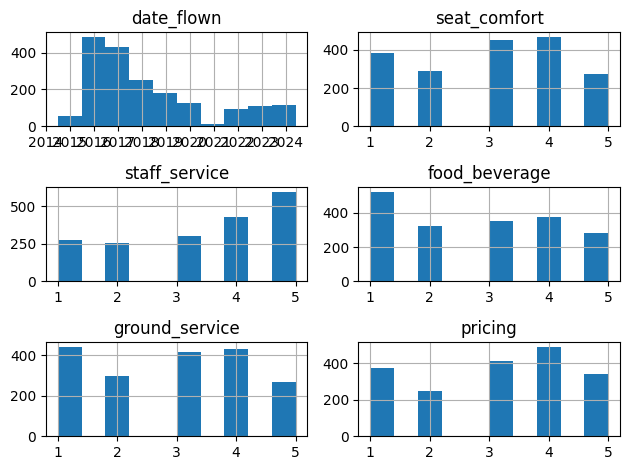

In [84]:
# Checking distribution
recent_ratings.hist()
plt.tight_layout()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'seat_comfort'),
  Text(1, 0, 'staff_service'),
  Text(2, 0, 'food_beverage'),
  Text(3, 0, 'ground_service'),
  Text(4, 0, 'pricing')])

<Figure size 4000x500 with 0 Axes>

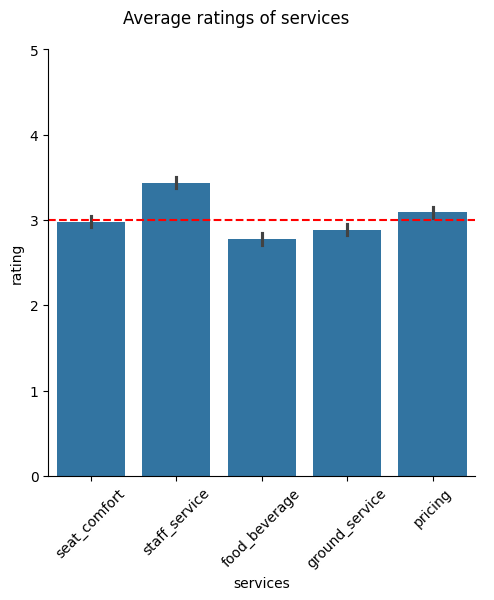

In [85]:
from matplotlib.lines import lineStyles


vars = recent_ratings.drop(columns=['aircraft','date_flown','recommended']).columns
avg_ratings = recent_ratings.reset_index().melt(id_vars=['index'],value_vars= vars,var_name= 'services', value_name= 'rating')
plt.figure(figsize=(40,5))
sns.catplot(data= avg_ratings,x= 'services', y= 'rating',kind= 'bar').fig.suptitle('Average ratings of services',y = 1.05)
plt.axhline(3, linestyle='--', color='red')
plt.ylim(0,5)
plt.xticks(rotation= 45)

By average both staff service and pricing are doing fine but can be improved on, seat comfort is fairly ok for customers. Food and ground service are on the other hand doing poorly

**Correlation between ratings**

<Axes: >

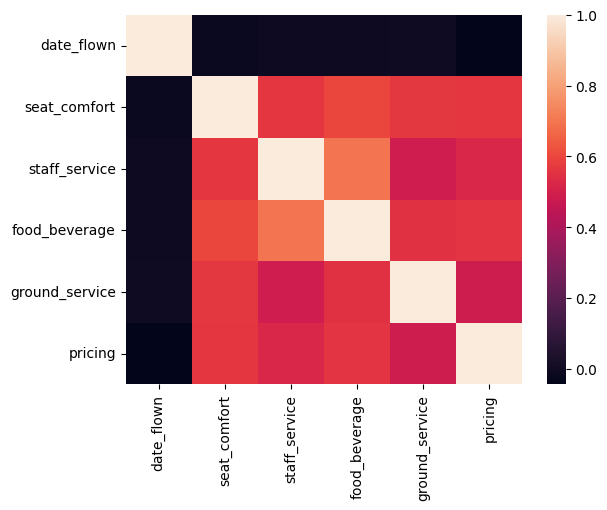

In [91]:
sns.heatmap(recent_ratings.drop(columns= ['aircraft','recommended']).corr())

food_beverages and staff services do have a high correlation whihch is relatable as well as the fair correlation food and seat comfort. let further explore ground_service to staff_service and pricing to ground_service 

<Axes: xlabel='ground_service', ylabel='pricing'>

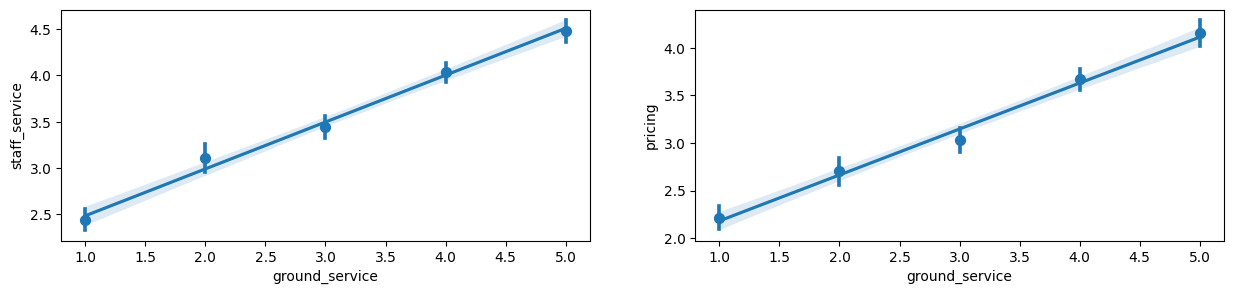

In [100]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize= (15,3))
sns.regplot(data=recent_ratings,x='ground_service', y= 'staff_service',x_estimator= np.mean,ax=ax[0])
sns.regplot(data=recent_ratings,x='ground_service', y= 'pricing',x_estimator= np.mean, ax= ax[1])

linear positive correlation observed 

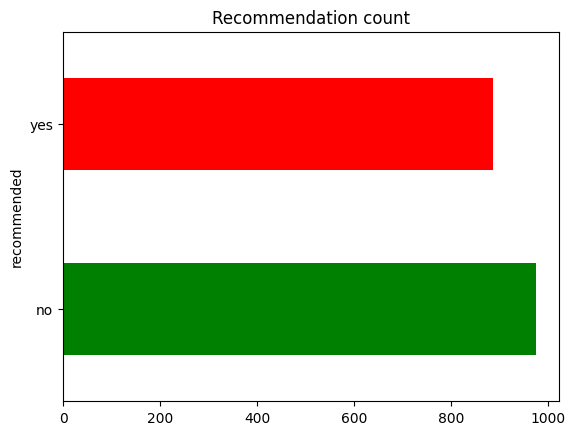

In [86]:
recent_ratings.recommended.value_counts().plot(kind= 'barh',color= ['green','red'],title='Recommendation count')
plt.show()

There are more recommendations from reviewers. 

# Challenges Encountered
1.	Data Imbalance:
	More data from certain routes and aircraft types, leading to potential bias.
2.	Missing and Irregular Data:
	Missing values in crucial columns and irregular entries required significant cleaning efforts.
3.	Class Imbalance:
 	Imbalance in the ratings dataset with more positive reviews, affecting sentiment analysis and predictions.


# Recommendations
Service Improvements
1.	Enhance Food and Ground Service:
	Focus on improving the quality and variety of food and the efficiency of ground services.
2.	Seat Comfort:
	Invest in better seating options to enhance passenger comfort, particularly for long-haul flights.

Operational Strategies
1.	Expand Route Network:
	Explore new routes and increase frequency to regions with growth potential beyond London-centric routes.
2.	Customer Service Training:
	Continuously train staff to ensure high standards in service, which is already performing well but can always improve.

Investment in Other Regions
1.	Regional Growth Opportunities:
	Invest in expanding services and marketing efforts in regions showing potential for growth, diversifying from the heavily London-centric operations.

By addressing these areas, British Airways can enhance passenger experience, improve service quality, and strategically expand their operations for sustained growth.

